#Import

In [24]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

#Load Dataset

In [25]:
df = pd.read_csv('iris.csv')

Separate features and labels manually

In [26]:
# data = [(row[:-1], row[-1]) for row in df.values]
data = [(row[:-1], row[-1]) for row in df.values]
label_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Next Standardization

In [27]:
def manual_standardize(data):
    features = [list(row[0]) for row in data]
    transposed_features = list(zip(*features))

    means = [sum(feature) / len(feature) for feature in transposed_features]
    std_devs = [math.sqrt(sum((x - mean) ** 2 for x in feature) / len(feature))
                for feature, mean in zip(transposed_features, means)]

    standardized_data = [
        ([(x - mean) / std if std != 0 else 0 for x, mean, std in zip(row[0], means, std_devs)], row[1])
        for row in data
    ]

    return standardized_data

# Standardize the data

In [28]:
data = manual_standardize(data)

# Split into train and test sets

In [29]:
# def train_test_split(data, test_size=0.3):
#     random.shuffle(data)
#     split_idx = int(len(data) * (1 - test_size))
#     return data[:split_idx], data[split_idx:]

def train_test_split(data, test_size=0.3):
    random.shuffle(data)
    split_idx = int(len(data) * (1 - test_size))
    return data[:split_idx], data[split_idx:]

train_data, test_data = train_test_split(data)

# Calculate Euclidean distance

In [30]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

# Calculate city block distance


In [31]:
# def manhattan_distance(point1, point2):
#     return sum(abs(a - b) for a, b in zip(point1, point2))

In [32]:
# label_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

#K nearest neighbors


In [33]:
def get_neighbors(train_data, test_instance, k):
    distances = [(train_instance, euclidean_distance(test_instance[0], train_instance[0])) for train_instance in train_data]
    distances.sort(key=lambda x: x[1])
    return [distances[i][0] for i in range(k)]

# Make predictions based on majority vote


In [34]:
def predict_classification(neighbors):
    classes = [neighbor[1] for neighbor in neighbors]
    return max(set(classes), key=classes.count)

# K-NN Algorithm


In [35]:
def knn(train_data, test_data, k):
    predictions = []
    for test_instance in test_data:
        neighbors = get_neighbors(train_data, test_instance, k)
        prediction = predict_classification(neighbors)
        predictions.append(prediction)
    return predictions

# Calculate accuracy

In [36]:
def calculate_accuracy(test_data, predictions):
    correct = sum(1 for actual, predicted in zip(test_data, predictions) if actual[1] == predicted)
    return correct / len(test_data)

# Generate confusion matrix


In [37]:
def confusion_matrix(test_data, predictions, label_mapping):
    num_classes = len(label_mapping)
    matrix = [[0] * num_classes for _ in range(num_classes)]
    for actual, predicted in zip(test_data, predictions):
        actual_idx = label_mapping[actual[1]]
        predicted_idx = label_mapping[predicted]
        matrix[actual_idx][predicted_idx] += 1
    return matrix

# K vs Error Rate and K vs Accuracy


In [38]:
# # def plot_k_vs_error(k_values, errors):
# #     plt.plot(k_values, errors, marker='o')
# #     plt.title('K vs Error Rate')
# #     plt.xlabel('K')
# #     plt.ylabel('Error Rate')
# #     plt.show()

# def plot_metrics(k_values, errors, accuracies):
#     plt.figure(figsize=(12, 5))

#     # Plot Error Rate
#     plt.subplot(1, 2, 1)
#     plt.plot(k_values, errors, marker='o', linestyle='dashed', color='blue')
#     plt.title('Error Rate vs K Value')
#     plt.xlabel('K')
#     plt.ylabel('Error Rate')

#     # Plot Accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='green')
#     plt.title('Accuracy vs K Value')
#     plt.xlabel('K')
#     plt.ylabel('Accuracy')

#     plt.tight_layout()
#     plt.show()

In [39]:
def plot_error_rate(k_values, errors):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, errors, marker='o', linestyle='dashed', color='blue')
    plt.title('Error Rate vs K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

In [40]:
def plot_accuracy(k_values, accuracies):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='green')
    plt.title('Accuracy vs K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()

# Plot K vs Accuracy


In [41]:
def plot_accuracy(k_values, accuracies):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='green')
    plt.title('Accuracy vs K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()

# Main driver


In [42]:
# # train_data, test_data = train_test_split(data)
# k_values = list(range(1, 21))
# errors = []

k_values = list(range(1, 40))  # Testing values of K from 1 to 39
errors = []
accuracies = []

# Testing different K values

In [43]:
# k_values = list(range(1, 21))
# accuracies = []

# for k in k_values:
#     predictions = knn(train_data, test_data, k)
#     accuracy = calculate_accuracy(test_data, predictions)
#     accuracies.append(accuracy)

for k in k_values:
    predictions = knn(train_data, test_data, k)
    accuracy = calculate_accuracy(test_data, predictions)
    error_rate = 1 - accuracy
    errors.append(error_rate)
    accuracies.append(accuracy)

# Plot Error Rate vs. K

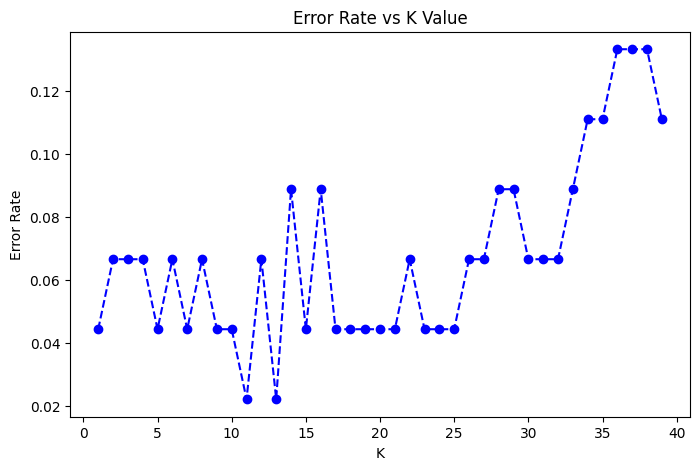

Minimum error rate: 0.02 at K = 11


In [44]:
plot_error_rate(k_values, errors)
best_k_error = k_values[errors.index(min(errors))]
print(f"Minimum error rate: {min(errors):.2f} at K = {best_k_error}")

# Plot Accuracy vs. K


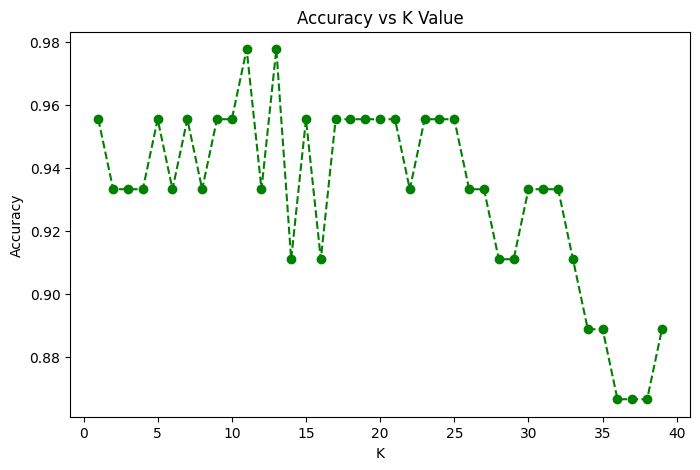

Maximum accuracy: 0.98 at K = 11


In [45]:
plot_accuracy(k_values, accuracies)
best_k_accuracy = k_values[accuracies.index(max(accuracies))]
print(f"Maximum accuracy: {max(accuracies):.2f} at K = {best_k_accuracy}")

# Final Predictions using the best K


In [46]:
predictions = knn(train_data, test_data, best_k_accuracy)
accuracy = calculate_accuracy(test_data, predictions)
conf_matrix = confusion_matrix(test_data, predictions, label_mapping)

print(f"Final accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
for row in conf_matrix:
    print(row)

Final accuracy: 0.98
Confusion Matrix:
[16, 0, 0]
[0, 15, 0]
[0, 1, 13]
